In [3]:
# create and split a synthetic dataset
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
import numpy as np
from sklearn.model_selection import train_test_split
# X, y = make_blobs(centers=2, random_state=59)
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
# we rename the classes "blue" and "red" for illustration purposes:
y_named = np.array(["blue", "red"])[y]
# we can call train test split with arbitrary many arrays
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
train_test_split(X, y_named, y, random_state=0)
# build the gradient boosting model model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [4]:
print(X_test.shape)
print(gbrt.decision_function(X_test).shape)

(25, 2)
(25,)


In [10]:
print(gbrt.decision_function(X_test) > 0)
print(gbrt.predict(X_test))
decision_function = gbrt.decision_function(X_test)
np.min(decision_function), np.max(decision_function)

[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


(-7.69097177301218, 4.289866676868515)

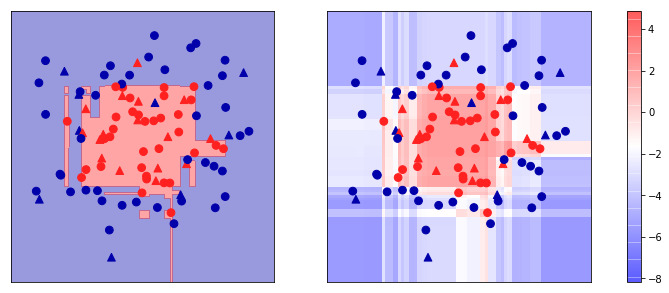

In [9]:
import matplotlib.pyplot as plt
import mglearn
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm='bwr')
for ax in axes:
    # plot training and test points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=mglearn.cm2, s=60, marker='^')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=mglearn.cm2, s=60)
plt.colorbar(scores_image, ax=axes.tolist())